### 세 번째 과제 : IQR / Z_score 기반 이상치 탐지

In [1]:
세 번째 과제는 오늘 실습할 때 사용한
Air Quality 데이터셋에서 변수 PT08.S3(NOX) 에 대해서
IQR 기반 그리고 Z-score 기반이상치 탐지하는 코드
를 작성해서 깃허브 계정에 업로드해주세요

SyntaxError: invalid syntax (Temp/ipykernel_6652/3327962764.py, line 1)

In [2]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = 'C:/data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)

df.head()

C:\Users\Stat1738\AppData\Local\Temp/ipykernel_12932/941458836.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


<AxesSubplot:xlabel='Datetime'>

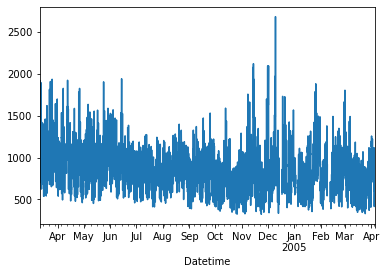

In [4]:
df['PT08.S3(NOx)'].plot()

In [3]:
pt = df['PT08.S3(NOx)'].copy()
pt.interpolate(inplace = True)

Text(0.5, 0, 'PT08.S3(NOx)')

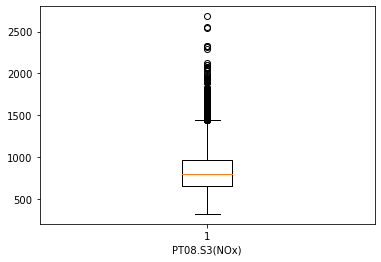

In [4]:
# boxplot
plt.boxplot(pt)
plt.xlabel('PT08.S3(NOx)')

In [5]:
# IQR-based Outlier Detection

q1 = pt.quantile(0.25)
median = pt.quantile(0.5)
q3 = pt.quantile(0.75)
print(q1, median, q3)

654.0 804.0 968.0


In [6]:
iqr = q3-q1
upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr
print(iqr, upper_fence, lower_fence)

314.0 1439.0 183.0


In [7]:
# filtering the outliers
outliers = pt.loc[(pt > upper_fence) | (pt < lower_fence)]
outliers

Datetime
2004-03-11 00:00:00    1462.0
2004-03-11 01:00:00    1453.0
2004-03-11 02:00:00    1579.0
2004-03-11 03:00:00    1705.0
2004-03-11 04:00:00    1818.0
                        ...  
2005-03-01 03:00:00    1791.0
2005-03-01 04:00:00    1804.0
2005-03-01 05:00:00    1727.0
2005-03-01 06:00:00    1677.0
2005-03-07 04:00:00    1490.0
Name: PT08.S3(NOx), Length: 239, dtype: float64

In [10]:
# mask for outliers
mask = pt.index.isin(outliers.index)
mask[:50]

array([False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [11]:
# Removing the outliers
pt_refined = pt.copy()
pt_refined[mask] = np.nan
print(pt_refined[mask])

Datetime
2004-03-11 00:00:00   NaN
2004-03-11 01:00:00   NaN
2004-03-11 02:00:00   NaN
2004-03-11 03:00:00   NaN
2004-03-11 04:00:00   NaN
                       ..
2005-03-01 03:00:00   NaN
2005-03-01 04:00:00   NaN
2005-03-01 05:00:00   NaN
2005-03-01 06:00:00   NaN
2005-03-07 04:00:00   NaN
Name: PT08.S3(NOx), Length: 239, dtype: float64


<AxesSubplot:xlabel='Datetime'>

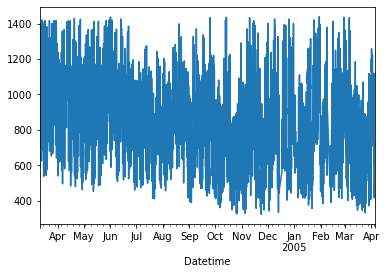

In [12]:
pt_refined.interpolate(inplace = True)
pt_refined.plot()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PT08.S3(NOx)', ylabel='Density'>

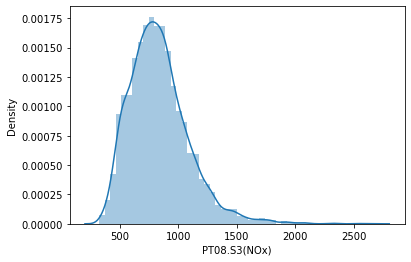

In [13]:
# Detecting Outliers with Z_scores
import seaborn as sns

sns.distplot(pt)

In [14]:
# Mean, std deviation
mean = np.mean(pt)
std = np.std(pt)
print(mean, std)

832.7588970823982 255.69616900657363


In [15]:
# Calculate Z_scores for each data points
outliers = []
thres = 3

for i in pt :
    z_score = (i-mean) / std
    if (np.abs(z_score) > thres) :
        print(z_score)
        outliers.append(i)

3.4112404042126165
3.8531711552247483
4.244260315412475
3.5402998270745667
3.3134681141656848
4.146488025365544
4.154309808569298
3.3330225721750715
3.0788146180530487
3.833616697215362
3.6106958759083576
3.7280226239646757
3.395596837805108
4.205151399393703
3.419062187416371
4.310745472644389
3.0162403524230124
3.168765124896226
3.051438376839908
3.387775054601353
3.5833196346952167
3.8844582880397667
3.4112404042126165
3.0592601600436624
3.8688147216322575
4.2638147734218625
3.6106958759083576
3.051438376839908
3.716289949159044
3.462081995037021
3.4777255614445304
3.8844582880397667
3.137477992081208
3.098369076062435
3.8101513476040982
4.189507832986194
3.794507781196589
3.763220648381571
4.334210822255653
4.240349423810598
3.4034186210088624
3.6146067675102347
3.254804740137526
3.0045076776173807
3.2469829569337714
3.168765124896226
3.6693592499365164
4.8660920801109615
4.807428706082803
4.424161329098831
3.7553988651778165
3.2508938485356484
3.4542602118332666
5.038171310593562


In [16]:
# Simplified version of filtering outliers
outliers = pt.loc[np.abs((pt*mean) / std) > 3]
outliers

Datetime
2004-03-10 18:00:00    1056.0
2004-03-10 19:00:00    1174.0
2004-03-10 20:00:00    1140.0
2004-03-10 21:00:00    1092.0
2004-03-10 22:00:00    1205.0
                        ...  
2005-04-04 10:00:00     539.0
2005-04-04 11:00:00     604.0
2005-04-04 12:00:00     603.0
2005-04-04 13:00:00     702.0
2005-04-04 14:00:00     654.0
Name: PT08.S3(NOx), Length: 9357, dtype: float64

In [25]:
# Mask for outliers
mask = pt.index.isin(outliers.index)
mask[:50]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype

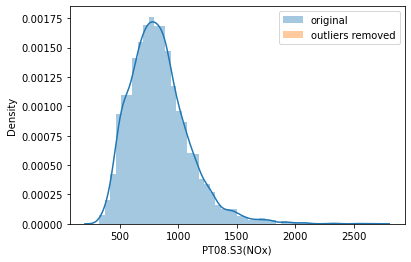

In [19]:
# Comparison of distributions before/after outlier removal
sns.distplot(pt, axlabel='PT08.S3(NOx)', label='original')
sns.distplot(pt[~mask], label='outliers removed')
plt.legend(loc='best')